In [2]:
import time
import utils as f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
pd.set_option('chained_assignment',None)
sns.set()

In [3]:
num_version = '0629'
df_ml = f.load_pickle('df_ml_train_{}.p'.format(num_version))
df_ml.head()

index_x     molecule_name  atom_index_0  atom_index_1  type  \
0        0  dsgdb9nsd_000001             1             0  1JHC   
1        1  dsgdb9nsd_000001             2             0  1JHC   
2        2  dsgdb9nsd_000001             3             0  1JHC   
3        3  dsgdb9nsd_000001             4             0  1JHC   
4        4  dsgdb9nsd_000001             1             2  2JHH   

   scalar_coupling_constant type_0 type_3       x_0       y_0  ...  type_3JHC  \
0                   84.8076      1      0  0.002150 -0.006031  ...          0   
1                   84.8074      1      0  1.011731  1.463751  ...          0   
2                   84.8093      1      0 -0.540815  1.447527  ...          0   
3                   84.8095      1      0 -0.523814  1.437933  ...          0   
4                  -11.2570      2      1  0.002150 -0.006031  ...          0   

   type_3JHN  nb_atome  nb_atome_manquant  atom_index  atom_C  atom_F  atom_H  \
0          0         5                  0          10       1       0       4   
1          0         5                  0          10       1       0       4   
2          0         5                  0          10       1       0       4   
3          0         5                  0          10       1       0       4   
4          0         5                  0          10       1       0       4   

   atom_N  atom_O  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 66 columns]

In [4]:
print(df_ml.shape)

(4658147, 66)


# Preparation à la modélisation

In [21]:
X = df_ml.dropna().drop(['molecule_name','scalar_coupling_constant'],axis=1)
y = df_ml.dropna()['scalar_coupling_constant']

In [23]:
X.isnull().sum().sum()

0

In [16]:
print(X.dropna().shape)
print(X.shape)

(4658146, 64)
(4658147, 64)


In [ ]:
X = df_ml.dropna().drop(['molecule_name','scalar_coupling_constant'],axis=1)
y = df_ml.dropna()['scalar_coupling_constant']

score = 0
nb_type = X.type.nunique()
unique_type = X.type.unique()
results = {}
models = {}
for type_ in unique_type:
    print(type_)
    X_tmp = X[X['type']==type_].drop('type', axis=1)
    y_tmp = y.loc[X_tmp.index]
    #X_train, X_test, y_train, y_test = train_test_split(X_tmp, y_tmp, test_size=0.3, random_state=18)
    
    regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
    
    #regr = LinearRegression()
    rep = f.cross_val_sk_learn(X_tmp, y_tmp, 3, regr, f.kaggle_metric)
    score_type = np.mean(rep[1])
    score += score_type
   
    print(np.round(score_type,4),np.round(score,4))
    
    #results[type_] = {'y_index':y_tmp.index, 'y_reel':y_test, 'y_pred':y_pred, 'mae':mae, 'log_mae':log_mae}
    #models[type_] = reg_all

final_score = score/nb_type
print('\n>>>', np.round(final_score,4))


# Tuning models separately

In [7]:
type_number = 0
unique_type = X.type.unique()
type_ = unique_type[type_number]
print('Tuning model for {}'.format(type_))
X_tmp = X[X['type']==type_].drop('type', axis=1)
y_tmp = y.loc[X_tmp.index]

Tuning model for 1JHC


In [ ]:
# Selecting model
regr = Ridge(alpha=0.7, normalize=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
regr = Ridge(alpha=0.1, normalize=True)

rep = f.cross_val_sk_learn(X_tmp, y_tmp, 6, regr, f.kaggle_metric)
train_score = np.round(np.mean(rep[0]), 4)
train_score = np.round(np.mean(rep[1]), 4)

In [53]:
kaggle_metric(ridge_predict, y_test)

2.1070119667622693

In [9]:
model_list = [Ridge(alpha=0.7, normalize=False), Ridge(alpha=0.1, normalize=True)]
model_rep = []
for mod in model_list:
    rep = f.cross_val_sk_learn(X_tmp, y_tmp, 6, mod, f.kaggle_metric)
    model_rep.append((mod, rep))

Fold 0 started at Tue Jun 25 20:35:19 2019
Fold 1 started at Tue Jun 25 20:35:22 2019
Fold 2 started at Tue Jun 25 20:35:25 2019
Fold 3 started at Tue Jun 25 20:35:29 2019
Fold 4 started at Tue Jun 25 20:35:32 2019
Average score for train set:  2.08684
Average score for test set:  2.08688
Copyright Noctis
Fold 0 started at Tue Jun 25 20:35:35 2019
Fold 1 started at Tue Jun 25 20:35:38 2019
Fold 2 started at Tue Jun 25 20:35:41 2019
Fold 3 started at Tue Jun 25 20:35:44 2019
Fold 4 started at Tue Jun 25 20:35:48 2019
Average score for train set:  2.10782
Average score for test set:  2.1078400000000004
Copyright Noctis


In [10]:
model_rep

[(Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=None, solver='auto', tol=0.001),
  ([2.0879, 2.0876, 2.0866, 2.0869, 2.0852],
   [2.0845, 2.0846, 2.0869, 2.0861, 2.0923])),
 (Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=True, random_state=None, solver='auto', tol=0.001),
  ([2.1087, 2.1086, 2.1077, 2.1079, 2.1062],
   [2.1064, 2.1052, 2.1074, 2.1063, 2.1139]))]

# Exploitation des résultats

In [10]:
results.keys()

dict_keys(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'])

In [11]:
df_pred=pd.DataFrame()
for k, v in results.items():
    tmp = pd.DataFrame({'type':k,'y_pred':v['y_pred'], 'y_reel':v['y_reel']})#, index=v['y_index'])
    df_pred = pd.concat([df_pred, tmp])

In [12]:
df_pred.sort_index().head()

type     y_pred    y_reel
id                           
2   2JHH -12.571762 -11.25480
9   1JHC  96.631821  84.80950
24  3JHH   6.822451  13.69130
26  1JHC  89.851753  83.54170
34  3JHH   4.217207   3.25243

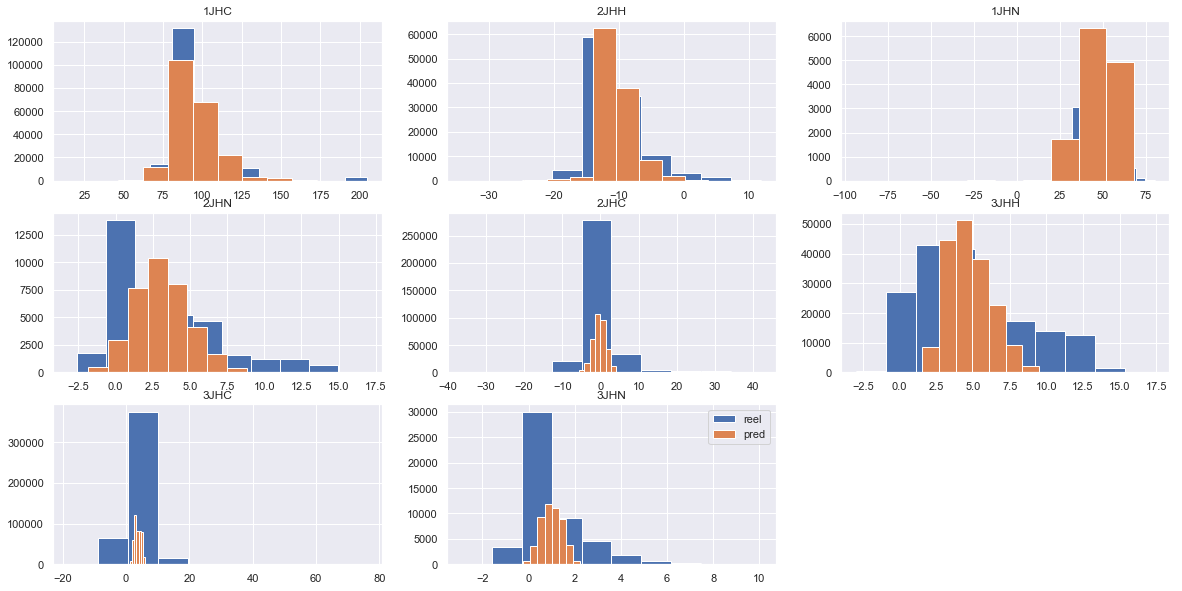

In [13]:
i=1
_= plt.figure(figsize=(20,10))
for type_ in df_pred.type.unique():
    _ = plt.subplot(3,3,i)
    df_pred.loc[df_pred['type']== type_,'y_reel'].hist(label='reel')
    df_pred.loc[df_pred['type']== type_,'y_pred'].hist(label='pred')
    _ = plt.title(type_)
    i+=1
_ = plt.legend()
_ = plt.show()
    